In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go


In [73]:
nutrients = pd.read_csv('nutrients_csvfile.csv')
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [8]:
nutrients.shape

(335, 10)

In [9]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


# Cleaning

Replacing all "t" and "t'" with 0 because there should be some numeric data in those columns

In [74]:
nutrients =nutrients.replace('t',0)
nutrients =nutrients.replace("t'",0)
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


Removing unnecessary strings from dataframe like ',' and 'a'

In [75]:
nutrients = nutrients.replace(",","",regex=True)
nutrients['Fiber'] = nutrients['Fiber'].replace("a","",regex=True)
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


In [76]:
nutrients['Calories'].iloc[91]

'8-44'

In [77]:
nutrients['Calories'][91] = (8 + 44)/2

In [78]:
nutrients['Calories'][91]

26.0

Converting grams, calories, protein, fat, saturated fat, fiber and carbs to int 

In [79]:
nutrients['Grams']= pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [80]:
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660.0,32,40,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360.0,36,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127.0,9,5,4.0,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345.0,16,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,Dairy products


In [81]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

Now we have all the desired datatypes of each columns

In [82]:
nutrients.isnull().any()

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool

In [83]:
nutrients[nutrients['Calories'].isnull()]

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
134,Frozen peas,1 cup,100,NaN,5,0,0.0,1.8,12.0,Vegetables R-Z


In [84]:
print(nutrients.shape)
nutrients = nutrients.drop(index=134)
print(nutrients.shape)

(335, 10)
(334, 10)


In [85]:
nutrients[nutrients['Sat.Fat'].isnull()]

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
42,Salt pork,2 oz.,60,470.0,3,55,NaN,0.0,0.0,Meat Poultry
100,Beetroots,1 cup,165,1.0,12,0,NaN,0.0,0.8,Vegetables A-E


In [86]:
print(nutrients.shape)
nutrients = nutrients.drop(index=[42,100])
print(nutrients.shape)

(334, 10)
(332, 10)


In [87]:
nutrients[nutrients['Fiber'].isnull()]

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
81,Mackerel,3 oz.,85,155.0,18,9,0.0,NaN,0.0,Fish Seafood


In [88]:
print(nutrients.shape)
nutrients = nutrients.drop(index=81)
print(nutrients.shape)

(332, 10)
(331, 10)


In [89]:
nutrients.isnull().any()

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool

Now to null values are there is dataframe, done cleaning

# Visualization and Analysis

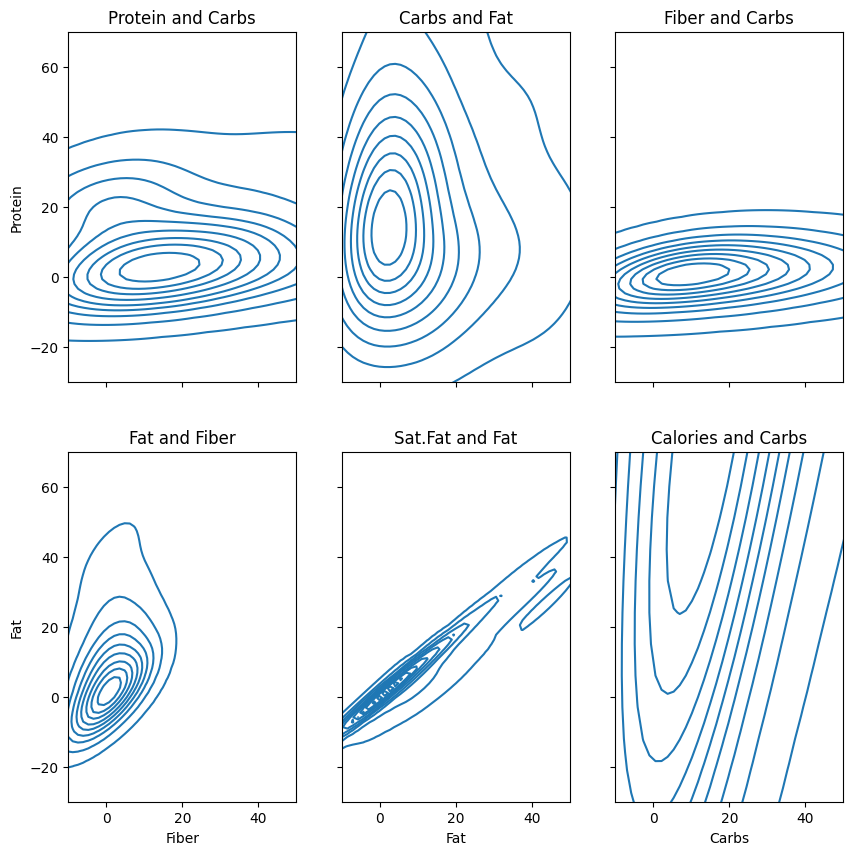

In [90]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

#f - represents the figure object, which is the top-level container for all elements of a plot. It acts as a canvas where you can add one or more axes. 
#axes - represents an array or a list of axes objects. An axes object represents an individual plot or graph within a figure.

# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Carbs'], y=nutrients['Protein'],ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Protein and Carbs')

# Adding labels and title to the plot
axes[0, 0].set_xlabel('Carbs')
axes[0, 0].set_ylabel('Protein')

#------------------------------------------------------------------------------------------------------------------------
# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Fat'], y=nutrients['Carbs'],ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

# Adding labels and title to the plot
axes[0, 1].set_xlabel('Fat')
axes[0, 1].set_ylabel('Carbs')

#------------------------------------------------------------------------------------------------------------------------
# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Carbs'], y=nutrients['Fiber'],ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Fiber and Carbs')

# Adding labels and title to the plot
axes[0, 2].set_xlabel('Carbs')
axes[0, 2].set_ylabel('Fiber')

#------------------------------------------------------------------------------------------------------------------------
# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Fiber'], y=nutrients['Fat'],ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Fat and Fiber')

# Adding labels and title to the plot
axes[1,0].set_xlabel('Fiber')
axes[1,0].set_ylabel('Fat')

#------------------------------------------------------------------------------------------------------------------------
# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Fat'], y=nutrients['Sat.Fat'],ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Sat.Fat and Fat')

# Adding labels and title to the plot
axes[1,1].set_xlabel('Fat')
axes[1,1].set_ylabel('Saturated Fat')

#------------------------------------------------------------------------------------------------------------------------
# Plotting a KDE plot between 'Column1' and 'Column2'
sns.kdeplot(data=nutrients, x=nutrients['Carbs'], y=nutrients['Calories'],ax=axes[1,2])
axes[1,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Calories and Carbs')

# Adding labels and title to the plot
axes[1,2].set_xlabel('Carbs')
axes[1,2].set_ylabel('Calories')

# Displaying the plot
plt.show()

# Food to Stay away from

In [91]:
high_cals = nutrients.sort_values(by='Calories', ascending= False)
top_20_high_cals = high_cals.head(20)
top_20_high_cals

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
4,Fortified milk,6 cups,1419,1373.0,89,42,23.0,1.4,119.0,Dairy products
223,White 20 slices or,1-lb. loaf,454,1225.0,39,15,12.0,9.0,229.0,Breads cereals fastfoodgrains
224,Whole-wheat,1-lb. loaf,454,1100.0,48,14,10.0,67.5,216.0,Breads cereals fastfoodgrains
33,Lard,1/2 cup,110,992.0,0,110,92.0,0.0,0.0,Fats Oils Shortenings
307,Brown firm-packed dark sugar,1 cup,220,815.0,0,0,0.0,0.0,210.0,Jams Jellies
34,Margarine,1/2 cup,112,806.0,0,91,76.0,0.0,0.0,Fats Oils Shortenings
305,Puddings Sugar,1 cup,200,770.0,0,0,0.0,0.0,199.0,Desserts sweets
247,Rice,1 cup,208,748.0,15,3,0.0,1.2,154.0,Breads cereals fastfoodgrains
249,White,1 cup,191,692.0,14,0,0.0,0.3,150.0,Breads cereals fastfoodgrains
9,(1/2 cup ice cream),2 cups,540,690.0,24,24,22.0,0.0,70.0,Dairy products


In [92]:
fig = px.bar(top_20_high_cals, x='Food', y='Calories' ,title=' Top 20 calorie rich foods')
fig.show()

Fortified milk has the most calories, followed by white bread.

Normally, fat sources are often looked down upon. But, a certain amount of fat is required for a good health. Let's look at some fatty foods.

In [94]:
nutrients['Grams']

0       976
1       984
2       246
3       252
4      1419
       ... 
330     346
331     346
332     346
333     230
334     230
Name: Grams, Length: 331, dtype: int64

# Converting all Food amount to 100g for proper comparisons

In [95]:
nutrients['Grams']

0       976
1       984
2       246
3       252
4      1419
       ... 
330     346
331     346
332     346
333     230
334     230
Name: Grams, Length: 331, dtype: int64

In [96]:
# Adjust respective columns based on the Grams scale for each row
nutrients['Calories'] = nutrients.apply(lambda row: row['Calories'] * 100 / row['Grams'], axis=1)
nutrients['Protein'] = nutrients.apply(lambda row: row['Protein'] * 100 / row['Grams'], axis=1)
nutrients['Fat'] = nutrients.apply(lambda row: row['Fat'] * 100 / row['Grams'], axis=1)
nutrients['Sat.Fat'] = nutrients.apply(lambda row: row['Sat.Fat'] * 100 / row['Grams'], axis=1)
nutrients['Fiber'] = nutrients.apply(lambda row: row['Fiber'] * 100 / row['Grams'], axis=1)
nutrients['Carbs'] = nutrients.apply(lambda row: row['Carbs'] * 100 / row['Grams'], axis=1)
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,67.622951,3.278689,4.098361,3.688525,0.000000,4.918033,Dairy products
1,Milk skim,1 qt.,984,36.585366,3.658537,0.000000,0.000000,0.000000,5.284553,Dairy products
2,Buttermilk,1 cup,246,51.626016,3.658537,2.032520,1.626016,0.000000,5.284553,Dairy products
3,Evaporated undiluted,1 cup,252,136.904762,6.349206,7.936508,7.142857,0.000000,9.523810,Dairy products
4,Fortified milk,6 cups,1419,96.758280,6.272023,2.959831,1.620860,0.098661,8.386187,Dairy products


In [97]:
nutrients['Grams'] = nutrients.apply(lambda row: row['Grams'] * 100 / row['Grams'], axis=1)
print(nutrients['Grams'])

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
330    100.0
331    100.0
332    100.0
333    100.0
334    100.0
Name: Grams, Length: 331, dtype: float64


In [98]:
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,100.0,67.622951,3.278689,4.098361,3.688525,0.000000,4.918033,Dairy products
1,Milk skim,1 qt.,100.0,36.585366,3.658537,0.000000,0.000000,0.000000,5.284553,Dairy products
2,Buttermilk,1 cup,100.0,51.626016,3.658537,2.032520,1.626016,0.000000,5.284553,Dairy products
3,Evaporated undiluted,1 cup,100.0,136.904762,6.349206,7.936508,7.142857,0.000000,9.523810,Dairy products
4,Fortified milk,6 cups,100.0,96.758280,6.272023,2.959831,1.620860,0.098661,8.386187,Dairy products


In [100]:
nutrients.dtypes

Food         object
Measure      object
Grams       float64
Calories    float64
Protein     float64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

Now data makes more sense to me because we should not be comparing protein content or any other nutrient content between 2 food items having different weights, so redrawing above charts

In [108]:
high_cals = nutrients.sort_values(by='Calories', ascending= False)
top_20_high_cals = high_cals.head(20)

fig = px.bar(top_20_high_cals, x='Food', y='Calories' ,title=' Calories per 100g Food')
fig.show()

In [112]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Fat', title='Fats per 100g Food')
fig.show()

Butter and Oysters contains highest amount of Fats

# Analysing Categories

In [117]:
category_dist = nutrients.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,4500.0,13133.001942,399.537333,248.112831,103.504165,56.407314,2296.693673
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,2800.0,5775.378447,339.409172,363.463841,307.742646,2.515468,280.919756
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2900.0,8177.227201,87.112202,196.029489,167.382273,12.222100,1539.511243
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,1200.0,677.479894,0.000000,0.000000,0.000000,0.000000,55.532378
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,1400.0,8581.664120,221.218487,1146.495098,751.118156,208.928571,230.714286
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1800.0,2814.476799,484.480910,213.350566,121.497534,102.173913,130.339788
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,2200.0,2183.457487,25.660167,17.750216,11.111111,23.980410,509.781827
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,2800.0,2110.548652,15.695096,36.304436,32.307692,13.105556,482.389931
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,800.0,751.866461,4.177035,0.108108,0.000000,11.613395,214.870589


In [123]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

### Some inferences from above charts 

It is clear that 'Breads, cereals, fastfood,grains' category has highest caloriy % but what we can see is they don't have much higher fat% so the high calories is due to presence of high amount of carbs and protein in it.
These also are rich in Carbs and thus provide good amount of energy to body.
So we should have a good control over food of category 'Breads, cereals, fastfood,grains' specially while cutting.

'Fats Oil Shortenings' category has highest fat% should be avoided.

Food in 'Meat Poultry' category contain good amount of protein and should be eaten by people trying to build muscle mass.

# Analyzing Fish Seafood and Meat Poultry Category

In [141]:
meat = nutrients[nutrients['Category'].isin(['Fish Seafood','Meat, Poultry'])]
meat_top_calories = meat.sort_values(by='Calories', ascending=False)
meat_top_calories = meat_top_calories.head(10)

fig = go.Figure(data=go.Bar(x=meat_top_calories['Food'], y=meat_top_calories['Calories'], marker_color='deepskyblue'))

fig.update_layout(title="Calories per 100g in Fish Seafood and Meat Poultry Category", xaxis_title="Food", yaxis_title="Calories")

fig.update_layout(
    title="Calories per 100g in Fish Seafood and Meat Poultry Category",
    xaxis_title="Food",
    yaxis_title="Calories",
    autosize=False,
    width=900,
    height=300,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

In 'Fish Seafood and Meat Poultry' category , food with highest calories are Sardines and Herring

# Analyzing Desserts sweets Category

In [140]:
desserts = nutrients[nutrients['Category'].isin(['Desserts sweets'])]
desserts_top_fat = desserts.sort_values(by='Fat', ascending=False)
desserts_top_fat = desserts_top_fat.head(10)

fig = go.Figure(data=go.Bar(x=desserts_top_fat['Food'], y=desserts_top_fat['Fat'], marker_color='deepskyblue'))

fig.update_layout(
    title="Desserts with high Fat per 100g",
    xaxis_title="Food",
    yaxis_title="Fat",
    autosize=False,
    width=900,
    height=300,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

Doughnuts have highest Fat amount in Dessert category followed by Chocolate cream

# Analyzing Fruits & Vagetables Category

In [143]:
fruits = nutrients[nutrients['Category'].isin(['Fruits A-F','Fruits G-P','Fruits R-Z','Vegetables A-E','Vegetables F-P','Vegetables R-Z'])]
fruits_top_fat = fruits.sort_values(by='Fiber', ascending=False)
fruits_top_fat = fruits_top_fat.head(10)

fig = go.Figure(data=go.Bar(x=fruits_top_fat['Food'], y=fruits_top_fat['Fiber'], marker_color='deepskyblue'))

fig.update_layout(
    title="Friuts & Veggies with high Fiber per 100g",
    xaxis_title="Food",
    yaxis_title="Fiber",
    autosize=False,
    width=900,
    height=300,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

'Raw reds' and 'Blackberries' in this category contains highest Fiber, they should be consumed because Fiber helps maintaining sugar level and lowers blood cholestrol

### Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes

In [144]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, Oysters have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose

# Food group with the most calorie content

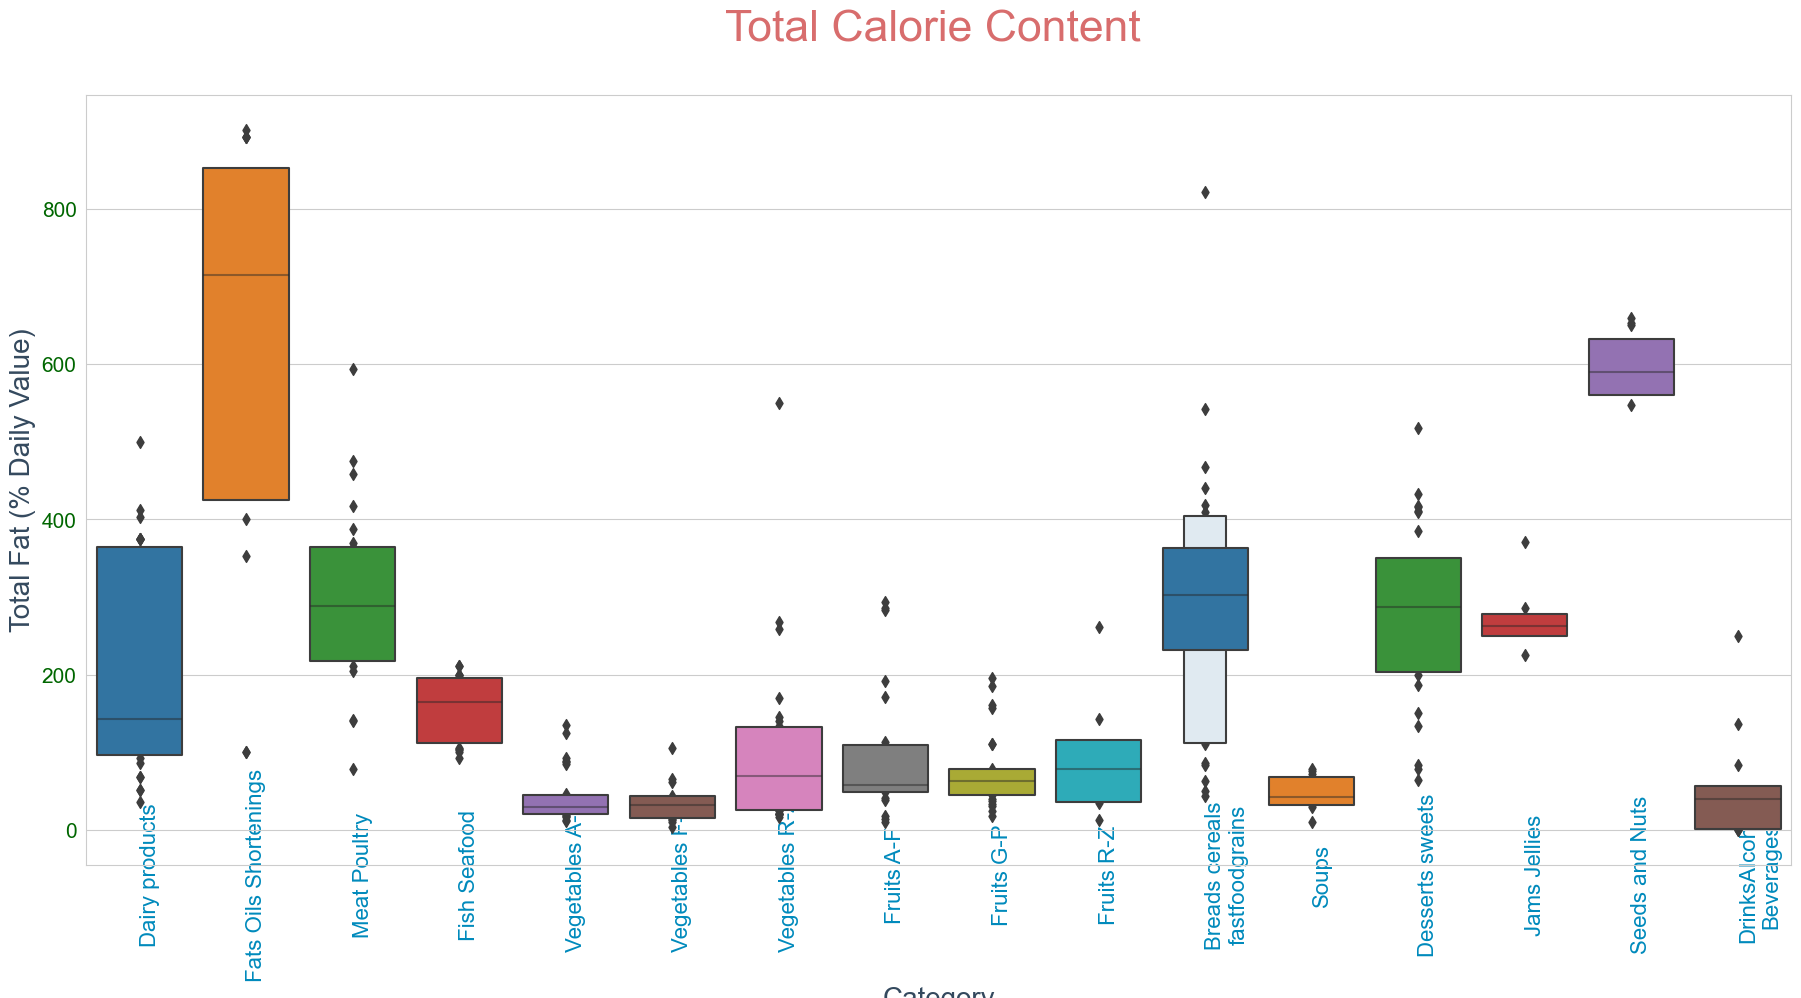

In [145]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=nutrients, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()